In [ ]:
# TODO popuniti kodom za problem 2b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving bottle.csv to bottle.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['bottle.csv']), low_memory = False)
data = df[["Salnty", "T_degC"]].dropna().iloc[:700]

In [ ]:
def create_design_matrix(x, degree):
    return np.vander(x, N=degree + 1, increasing=True)

def fit_ridge_regression(X, y, lambd):
    n_features = X.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0
    theta = np.linalg.pinv(X.T @ X + lambd * I) @ X.T @ y
    return theta

def predict(X, theta):
    return X @ theta

def cost_function(y_true, y_pred, theta, lambd):
    mse = np.mean((y_true - y_pred) ** 2)
    l2 = lambd * np.sum(theta[1:] ** 2)
    return mse + l2

In [ ]:
x = data["Salnty"].values
y = data["T_degC"].values
x_plot = np.linspace(np.min(x), np.max(x), 300)

In [ ]:
degree = 4
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
costs = []

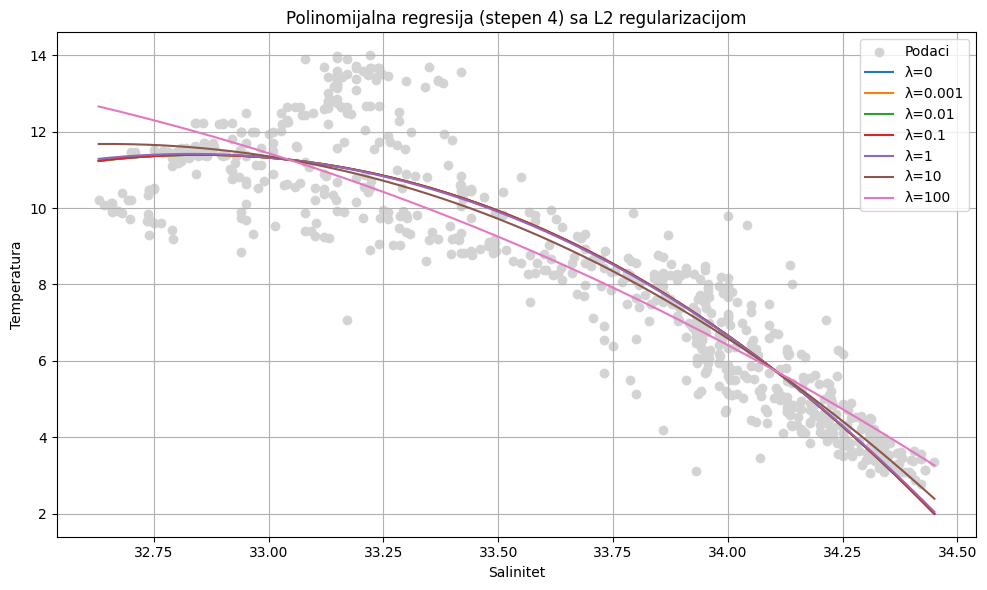

In [ ]:
# Prvi grafikon: sve regresione krive
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="lightgray", label="Podaci")

for lambd in lambdas:
    X_train = create_design_matrix(x, degree)
    theta = fit_ridge_regression(X_train, y, lambd)

    X_plot = create_design_matrix(x_plot, degree)
    y_plot = predict(X_plot, theta)

    plt.plot(x_plot, y_plot, label=f"λ={lambd}")

    y_pred = predict(X_train, theta)
    cost = cost_function(y, y_pred, theta, lambd)
    costs.append(cost)

plt.title("Polinomijalna regresija (stepen 4) sa L2 regularizacijom")
plt.xlabel("Salinitet")
plt.ylabel("Temperatura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

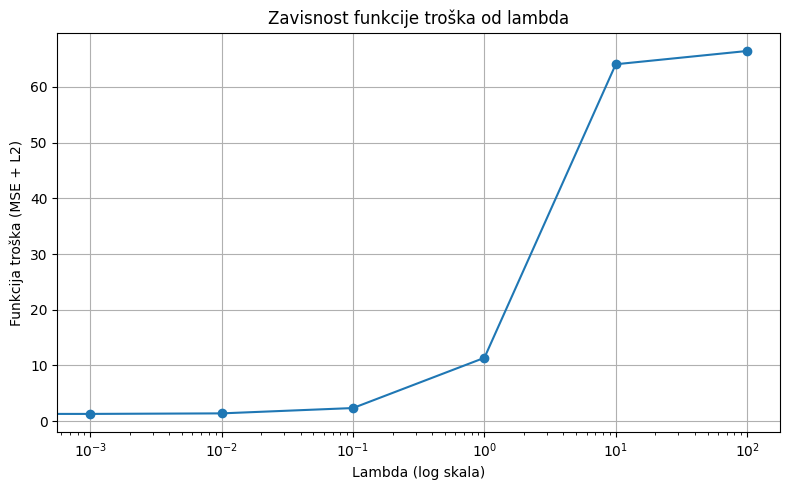

In [ ]:
#Drugi grafikon: zavisnost funkcije troška od lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, costs, marker="o")
plt.xscale("log")
plt.xlabel("Lambda (log skala)")
plt.ylabel("Funkcija troška (MSE + L2)")
plt.title("Zavisnost funkcije troška od lambda")
plt.grid(True)
plt.tight_layout()
plt.show()

Dodavanjem L2 regularizacije kontrolišemo složenost modela. Kada je lambda = 0, dobijamo običan
polinomijalni model stepena 4, koji dobro prati podatke, ali može biti sklon prenaučenosti (overfitting).

Što je vrednost lambda veća, to model postaje jednostavniji i „glatkiji“, jer regularizacija smanjuje velike koeficijente. Ovo pomaže da se izbegne prenaučenost, naročito ako bi se model koristio na novim podacima.

Međutim, kada je lambda prevelika (npr. 10 ili 100), model postaje previše ograničen i gubi sposobnost
da adekvatno prati podatke, što vodi ka podnaučenosti (underfitting).

Iz drugog grafika, tj. funkcije troška se vidi da vrednosti lambda oko 0.01 i 0.1 pružaju najbolju ravnotežu između
tačnosti i regularnosti, pa se one mogu smatrati optimalnim u ovom slučaju.